# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

(404, 13)

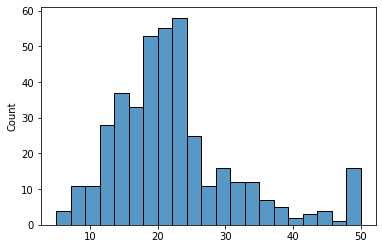

In [3]:
sns.histplot(y_train)
plt.show()

In [4]:
#pd.DataFrame(X_train).info()
#pd.DataFrame(X_train).describe()

❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [6]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

dummy_reg = DummyRegressor(strategy = "mean")
dummy_reg = dummy_reg.fit(X_train, y_train)

In [7]:
MAE_dummy = cross_val_score(dummy_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.662596 	Std:  1.220317


In [8]:
MAE_dummy = cross_val_score(dummy_reg, X_test, y_test, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.731623 	Std:  1.995709


In [9]:
MAE_baseline = -np.mean(MAE_dummy).round(6)

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation = 'relu', input_dim=13)) #activation='sigmoid', input_shape=(2,)
    model.add(layers.Dense(7, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'relu'))    
    return model

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [11]:
def compile_model(model, optimizer_name):
    model.compile(optimizer=optimizer_name, loss='mse', metrics=['mean_absolute_error'])    
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.001, restore_best_weights=True)#baseline=
model = initialize_model()
model = compile_model(model, 'adam')
history = model.fit(X_train, y_train, batch_size=15, epochs=300, validation_split=0.2, callbacks=[es], verbose=1)

Epoch 1/300
22/22 [==============================] - 0s 16ms/step - loss: 567.6766 - mean_absolute_error: 21.9472 - val_loss: 638.0376 - val_mean_absolute_error: 23.4803
Epoch 2/300
22/22 [==============================] - 0s 4ms/step - loss: 561.0597 - mean_absolute_error: 21.7317 - val_loss: 628.4529 - val_mean_absolute_error: 23.2335
Epoch 3/300
22/22 [==============================] - 0s 5ms/step - loss: 550.5855 - mean_absolute_error: 21.4138 - val_loss: 614.9233 - val_mean_absolute_error: 22.8919
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 534.3607 - mean_absolute_error: 20.9645 - val_loss: 592.9946 - val_mean_absolute_error: 22.3876
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 510.5353 - mean_absolute_error: 20.3567 - val_loss: 566.7809 - val_mean_absolute_error: 21.7773
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 484.6484 - mean_absolute_error: 19.6881 - val_loss: 536.9053 - val_mean_absolute_

22/22 [==============================] - 0s 6ms/step - loss: 18.0447 - mean_absolute_error: 3.0129 - val_loss: 18.8110 - val_mean_absolute_error: 3.3393
Epoch 51/300
22/22 [==============================] - 0s 5ms/step - loss: 17.8487 - mean_absolute_error: 2.9968 - val_loss: 18.6299 - val_mean_absolute_error: 3.3211
Epoch 52/300
22/22 [==============================] - 0s 3ms/step - loss: 17.6754 - mean_absolute_error: 2.9792 - val_loss: 18.3312 - val_mean_absolute_error: 3.2856
Epoch 53/300
22/22 [==============================] - 0s 4ms/step - loss: 17.4813 - mean_absolute_error: 2.9611 - val_loss: 18.1620 - val_mean_absolute_error: 3.2700
Epoch 54/300
22/22 [==============================] - 0s 5ms/step - loss: 17.3400 - mean_absolute_error: 2.9472 - val_loss: 18.1310 - val_mean_absolute_error: 3.2768
Epoch 55/300
22/22 [==============================] - 0s 5ms/step - loss: 17.1639 - mean_absolute_error: 2.9321 - val_loss: 17.8627 - val_mean_absolute_error: 3.2377
Epoch 56/300
22/2

22/22 [==============================] - 0s 4ms/step - loss: 13.0614 - mean_absolute_error: 2.5237 - val_loss: 13.5330 - val_mean_absolute_error: 2.8297
Epoch 100/300
22/22 [==============================] - 0s 4ms/step - loss: 12.9135 - mean_absolute_error: 2.5241 - val_loss: 13.5462 - val_mean_absolute_error: 2.8173
Epoch 101/300
22/22 [==============================] - 0s 4ms/step - loss: 12.8575 - mean_absolute_error: 2.5239 - val_loss: 13.3868 - val_mean_absolute_error: 2.7904
Epoch 102/300
22/22 [==============================] - 0s 4ms/step - loss: 12.7727 - mean_absolute_error: 2.5139 - val_loss: 13.4021 - val_mean_absolute_error: 2.8108
Epoch 103/300
22/22 [==============================] - 0s 3ms/step - loss: 12.7397 - mean_absolute_error: 2.5103 - val_loss: 13.4348 - val_mean_absolute_error: 2.8092
Epoch 104/300
22/22 [==============================] - 0s 4ms/step - loss: 12.6631 - mean_absolute_error: 2.4940 - val_loss: 13.2781 - val_mean_absolute_error: 2.7882
Epoch 105/30

22/22 [==============================] - 0s 3ms/step - loss: 10.0926 - mean_absolute_error: 2.2484 - val_loss: 12.5093 - val_mean_absolute_error: 2.5778
Epoch 149/300
22/22 [==============================] - 0s 3ms/step - loss: 9.9877 - mean_absolute_error: 2.2306 - val_loss: 12.2740 - val_mean_absolute_error: 2.5396
Epoch 150/300
22/22 [==============================] - 0s 3ms/step - loss: 9.9838 - mean_absolute_error: 2.2229 - val_loss: 12.4251 - val_mean_absolute_error: 2.5716
Epoch 151/300
22/22 [==============================] - 0s 3ms/step - loss: 9.9341 - mean_absolute_error: 2.2087 - val_loss: 12.2262 - val_mean_absolute_error: 2.5346
Epoch 152/300
22/22 [==============================] - 0s 3ms/step - loss: 9.9360 - mean_absolute_error: 2.2174 - val_loss: 12.5080 - val_mean_absolute_error: 2.5590
Epoch 153/300
22/22 [==============================] - 0s 3ms/step - loss: 9.8649 - mean_absolute_error: 2.1986 - val_loss: 12.2946 - val_mean_absolute_error: 2.5559
Epoch 154/300
22/

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [14]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mean_absolute_error'])
    ax2.plot(history.history['val_mean_absolute_error'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 22.8279 - mean_absolute_error: 2.9615
MAE with the rmsprop optimizer: 2.9615  reached in 14 s after 227 epochs


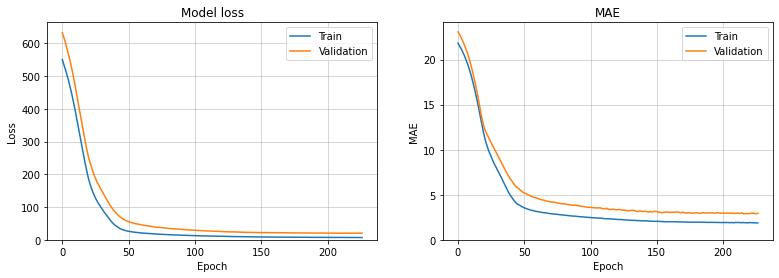

4/4 [==============================] - 0s 3ms/step - loss: 19.5730 - mean_absolute_error: 2.9452
MAE with the adam optimizer: 2.9452  reached in 15 s after 242 epochs


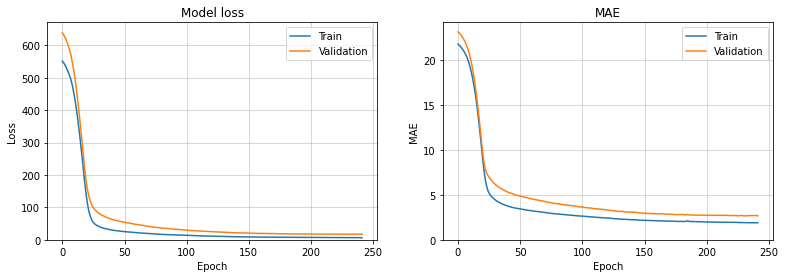

4/4 [==============================] - 0s 4ms/step - loss: 513.4927 - mean_absolute_error: 21.0515
MAE with the adagrad optimizer: 21.0515  reached in 17 s after 300 epochs


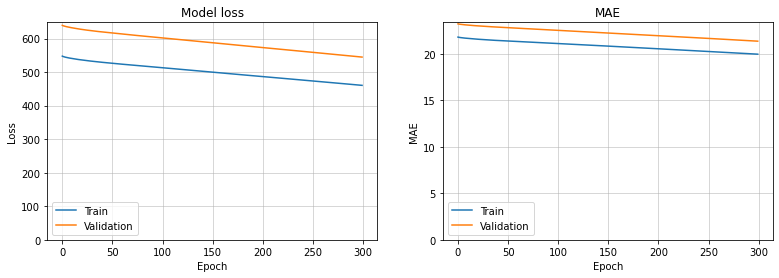

In [22]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.001, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=20, epochs=300, validation_split=0.3, callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [16]:
from tensorflow.keras import optimizers

In [23]:
model = initialize_model()
adam_optimizer = optimizers.Adam(learning_rate=0.1)
model = compile_model(model, adam_optimizer)
history = model.fit(X_train, y_train, batch_size=20, epochs=300, validation_split=0.3, callbacks=[es], verbose=1)

Epoch 1/300
15/15 [==============================] - 0s 27ms/step - loss: 185.3611 - mean_absolute_error: 10.2762 - val_loss: 61.3547 - val_mean_absolute_error: 5.3203
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 33.7213 - mean_absolute_error: 4.4894 - val_loss: 39.8623 - val_mean_absolute_error: 4.1301
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 16.3636 - mean_absolute_error: 3.0479 - val_loss: 29.5477 - val_mean_absolute_error: 3.8743
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 13.8102 - mean_absolute_error: 2.7682 - val_loss: 25.7660 - val_mean_absolute_error: 3.5293
Epoch 5/300
15/15 [==============================] - 0s 6ms/step - loss: 10.2368 - mean_absolute_error: 2.3956 - val_loss: 22.2923 - val_mean_absolute_error: 3.1990
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 11.2844 - mean_absolute_error: 2.5757 - val_loss: 19.2011 - val_mean_absolute_error: 3.0568
Epoch 7

15/15 [==============================] - 0s 6ms/step - loss: 9.8101 - mean_absolute_error: 2.3697 - val_loss: 19.0809 - val_mean_absolute_error: 3.1123
Epoch 51/300
15/15 [==============================] - 0s 6ms/step - loss: 12.1748 - mean_absolute_error: 2.7036 - val_loss: 22.4173 - val_mean_absolute_error: 3.1793
Epoch 52/300
15/15 [==============================] - 0s 5ms/step - loss: 8.5507 - mean_absolute_error: 2.2050 - val_loss: 13.6025 - val_mean_absolute_error: 2.4513
Epoch 53/300
15/15 [==============================] - 0s 5ms/step - loss: 7.5216 - mean_absolute_error: 2.0649 - val_loss: 16.3421 - val_mean_absolute_error: 2.7922
Epoch 54/300
15/15 [==============================] - 0s 4ms/step - loss: 9.1603 - mean_absolute_error: 2.2833 - val_loss: 18.4165 - val_mean_absolute_error: 2.8576
Epoch 55/300
15/15 [==============================] - 0s 5ms/step - loss: 8.9025 - mean_absolute_error: 2.2396 - val_loss: 17.8315 - val_mean_absolute_error: 2.7564
Epoch 56/300
15/15 [==

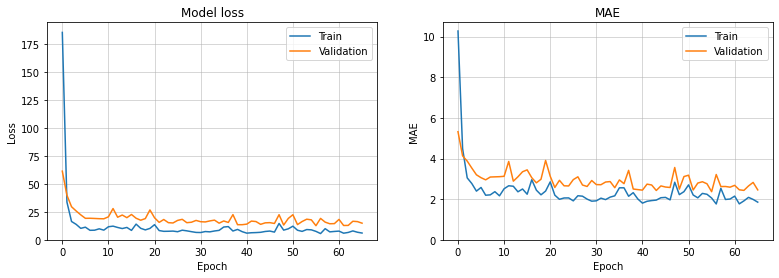

In [24]:
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 3ms/step - loss: 26.9299 - mean_absolute_error: 3.8290
MAE with the 0.0001 learning rate: 3.8290 reached in 28 s after 500 epochs


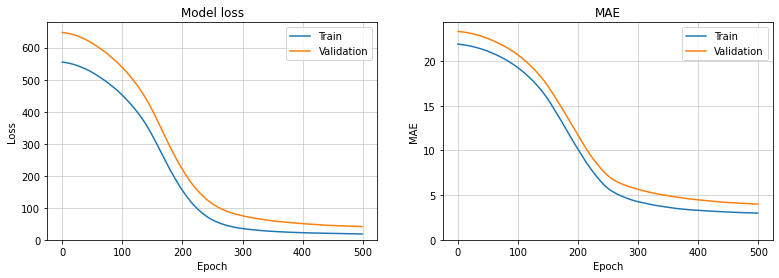

4/4 [==============================] - 0s 2ms/step - loss: 20.8355 - mean_absolute_error: 3.4205
MAE with the 0.001 learning rate: 3.4205 reached in 9 s after 141 epochs


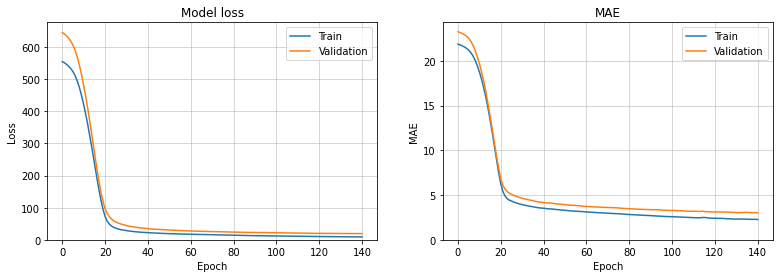

4/4 [==============================] - 0s 4ms/step - loss: 21.4874 - mean_absolute_error: 2.9576
MAE with the 0.01 learning rate: 2.9576 reached in 5 s after 60 epochs


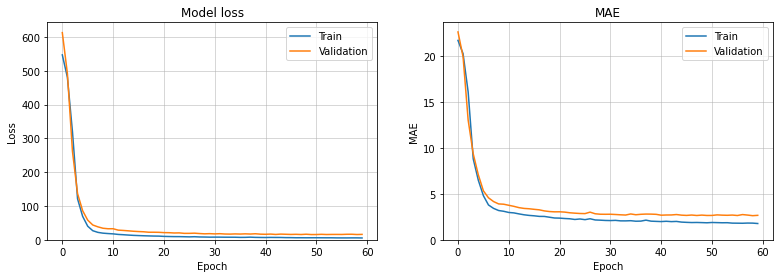

4/4 [==============================] - 0s 2ms/step - loss: 24.1170 - mean_absolute_error: 3.0723
MAE with the 0.1 learning rate: 3.0723 reached in 3 s after 37 epochs


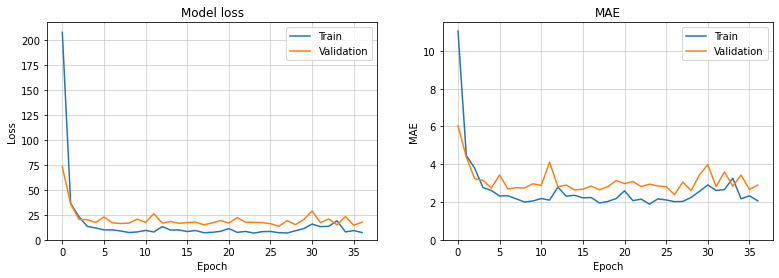

4/4 [==============================] - 0s 6ms/step - loss: 615.8578 - mean_absolute_error: 23.0784
MAE with the 1 learning rate: 23.0784 reached in 2 s after 11 epochs


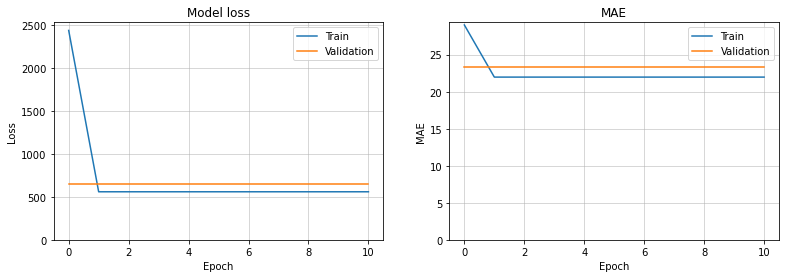

4/4 [==============================] - 0s 3ms/step - loss: 615.8578 - mean_absolute_error: 23.0784
MAE with the 5 learning rate: 23.0784 reached in 2 s after 11 epochs


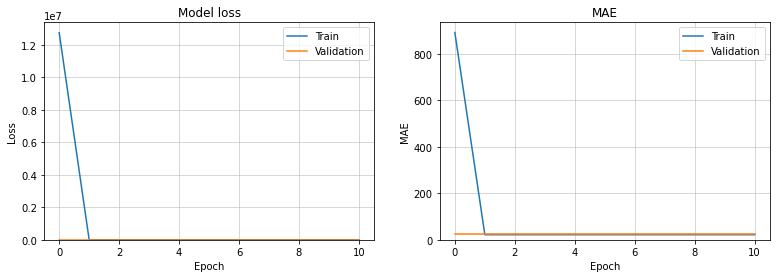

In [25]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model, adam_optimizer)  
    
    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.001, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    #shuffle=True
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [26]:
def compile_model_metric(model, optimizer_name, loss_metric):
    model.compile(optimizer=optimizer_name, loss=loss_metric, metrics=['mean_absolute_error', 'mse'])    
    return model

4/4 [==============================] - 0s 5ms/step - loss: 2.6424 - mean_absolute_error: 2.6424 - mse: 17.0542
MAE with the 0.005 learning rate: 2.6424 reached in 8 s after 106 epochs


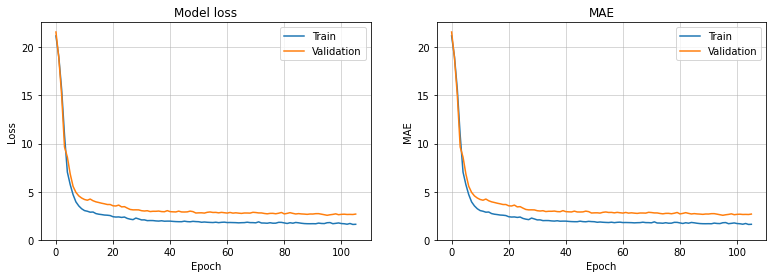

4/4 [==============================] - 0s 3ms/step - loss: 2.6128 - mean_absolute_error: 2.6128 - mse: 15.8737
MAE with the 0.01 learning rate: 2.6128 reached in 4 s after 57 epochs


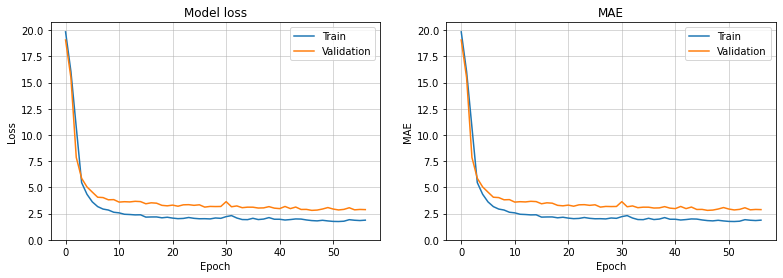

In [27]:
learning_rates = [0.005, 0.01]
for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model_metric(model, adam_optimizer, 'mae')  
    
    es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, min_delta=0.001)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

4/4 [==============================] - 0s 6ms/step - loss: 24.7020 - mean_absolute_error: 3.2139 - mse: 24.7020
MAE with the 0.005 learning rate: 3.2139 reached in 9 s after 115 epochs


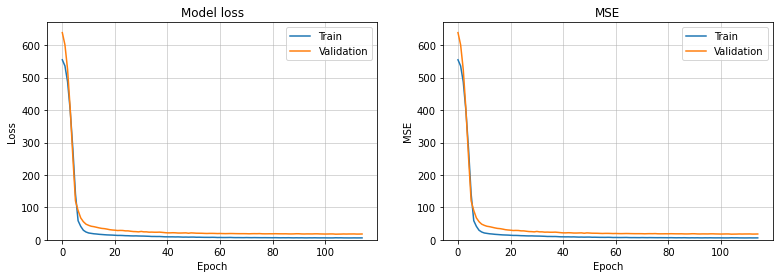

4/4 [==============================] - 0s 4ms/step - loss: 19.0830 - mean_absolute_error: 3.0146 - mse: 19.0830
MAE with the 0.01 learning rate: 3.0146 reached in 6 s after 75 epochs


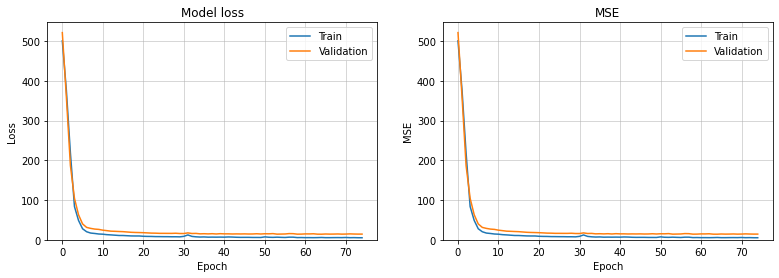

In [28]:
learning_rates = [0.005, 0.01]
for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model_metric(model, adam_optimizer, 'mse')  
    
    es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, min_delta=0.01)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mse(history)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [29]:
model = initialize_model()
lr = 0.01
adam_optimizer = optimizers.Adam(learning_rate=lr)
loss_metric = 'mse'
model.compile(optimizer=adam_optimizer, loss=loss_metric, metrics=['mean_absolute_error'])

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, min_delta=0.01)
history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)

4/4 [==============================] - 0s 5ms/step - loss: 24.5943 - mean_absolute_error: 2.9925
MSE with the 0.01 learning rate: 2.9925 after 53 epochs


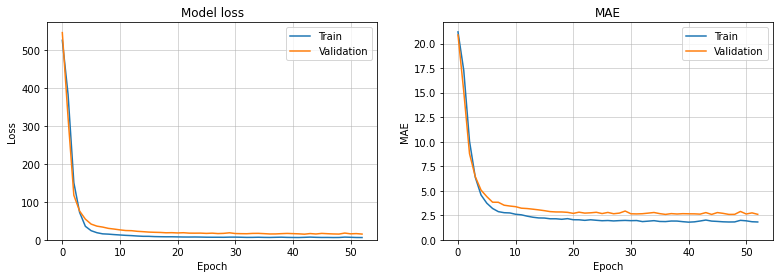

In [31]:
res = model.evaluate(X_test, y_test)[1]
print(f'MSE with the {lr} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [32]:
import tensorflow as tf

model.save('model_1')
models.save_model(model, 'adam_005_NN_model', overwrite=True, include_optimizer=True, save_format=None, 
                  signatures=None, options=None)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_1\assets
INFO:tensorflow:Assets written to: adam_005_NN_model\assets


In [33]:
loaded_model1 = models.load_model('model_1')
loaded_model = models.load_model('adam_005_NN_model')

In [35]:
x_check = tf.random.uniform((10, 13))
assert np.allclose(model.predict(x_check), loaded_model1.predict(x_check))
assert np.allclose(model.predict(x_check), loaded_model.predict(x_check))

In [36]:
np.testing.assert_allclose(model.predict(x_check), loaded_model.predict(x_check))

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [77]:
model_lr = initialize_model()

initial_learning_rate = 0.01
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=5000, decay_rate=0.7, staircase=True)
adam_optimizer = optimizers.Adam(learning_rate=lr_schedule)
loss_metric = 'mse'

model_lr.compile(optimizer=adam_optimizer, loss=loss_metric, metrics=['mean_absolute_error'])

In [78]:
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=50)
history = model_lr.fit(X_train, y_train, batch_size=20, epochs=250, validation_split=0.3, callbacks=[es], verbose=0)

4/4 [==============================] - 0s 5ms/step - loss: 18.5096 - mean_absolute_error: 2.9063
MSE with the 0.001 learning rate: 2.9063 after 250 epochs


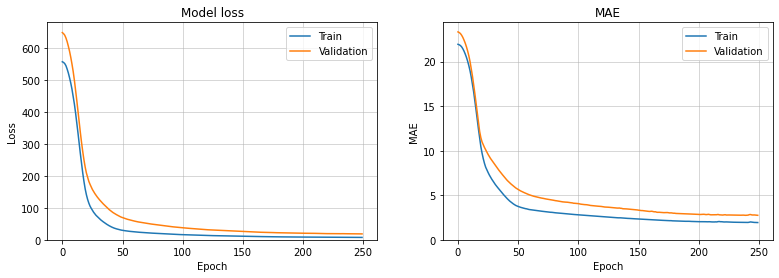

In [76]:
# With staircase=False and initial_learning_rate = 0.001
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MSE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

4/4 [==============================] - 0s 4ms/step - loss: 20.7500 - mean_absolute_error: 2.7945
MSE with the 0.005 learning rate: 2.7945 after 191 epochs


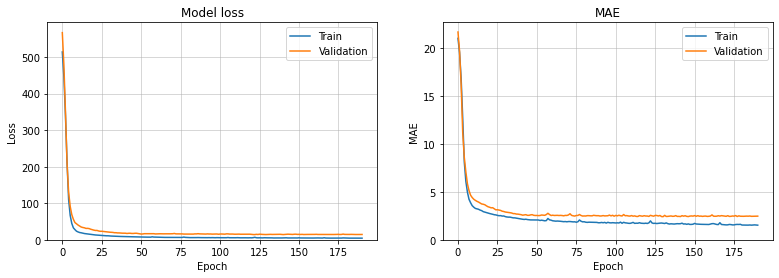

In [70]:
# With staircase=True and initial_learning_rate = 0.005
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MSE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

4/4 [==============================] - 0s 6ms/step - loss: 20.3563 - mean_absolute_error: 2.8120
MAE with the 0.01 learning rate: 2.8120 after 249 epochs


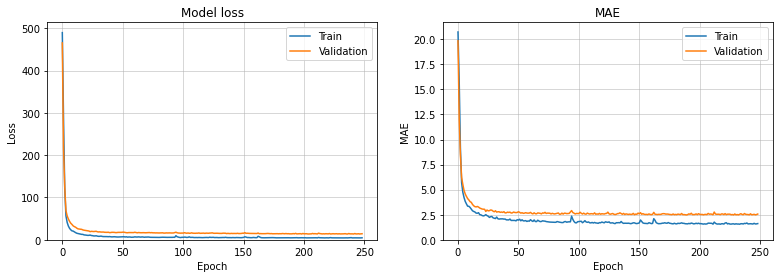

In [61]:
# With staircase=False and initial_learning_rate = 0.01
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MAE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 20.0071 - mean_absolute_error: 2.9082
MAE with the 0.1 learning rate: 2.9082 after 171 epochs


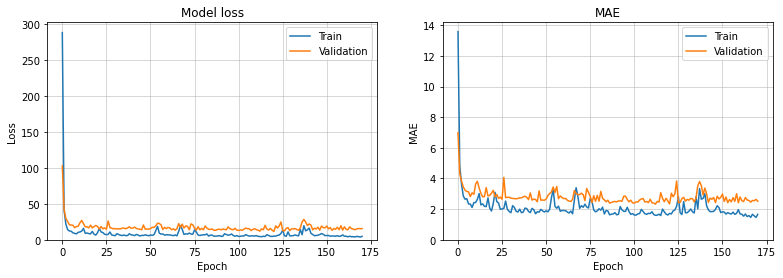

In [52]:
# With staircase=False and initial_learning_rate = 0.1
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MAE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)